In [2]:
import pandas as pd 
import numpy as np
import json
import string
import re
from time import time

import matplotlib.pyplot as plt
stopwords = nltk.corpus.stopwords.words('english')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= (20,10)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

<IPython.core.display.Javascript object>

In [118]:
with open('data_science_profiles.json') as json_file:
    data_science_profiles = json.load(json_file)

In [119]:
data_science_profiles

[{'job_titles': 'Data Scientist',
  'skills': ['Data Science',
   'Machine Learning',
   'Deep Learning',
   'Quantitative Analytics',
   'Mathematics',
   'Quantitative Research',
   'Investment Strategies',
   'Python',
   'SQL',
   'R',
   'Java',
   'QlikView',
   'LaTeX',
   'Microsoft Office',
   'Kibana',
   'ElasticSearch',
   'PyTorch',
   'Keras',
   'Problem Solving',
   'Critical Thinking',
   'Presentation Skills',
   'Communication',
   'Quantitative Finance',
   'Financial Engineering',
   'Apache Spark',
   'Weka'],
  'certifications': ['Deep Neural Networks with PyTorch',
   'Neural Networks and Deep Learning',
   'Introduction to Deep Learning & Neural Networks with Keras',
   'Scalable Machine Learning on Big Data using Apache Spark',
   'Financial Engineering and Risk Management Part I',
   'Machine Learning with Python',
   'Applied Data Science Specialist',
   'Applied Data Science Specialization']},
 {'job_titles': 'Data Scientist',
  'skills': ['Data Analysis',


In [120]:
data_science_profiles_df = pd.DataFrame.from_dict(data_science_profiles)

<IPython.core.display.Javascript object>

In [121]:
def clean_text2(txt):
    txt = ''.join([wrd.lower() for wrd in txt if wrd not in string.punctuation])
    tokens = re.split('\W+', txt)
    tokens = [wrd for wrd in tokens if wrd not in stopwords]
    return tokens

In [122]:
data_science_profiles_df.head(50)

,job_titles,skills,certifications
0,Data Scientist,"[Data Science, Machine Learning, Deep Learning...","[Deep Neural Networks with PyTorch, Neural Net..."
1,Data Scientist,"[Data Analysis, Business Intelligence, Analyti...",[Microsoft Certified: Azure Data Scientist Ass...
2,Data Science Analyst | Accenture Digital,"[Business Analytics, Consulting, Digital Trans...","[Data Science & Advanced Analytics, SAS Certif..."
3,Data Analytics Consultant,"[Python, R, MySQL, SAS Programming, Risk Manag...","[Microsoft Certified: Azure Fundamentals, Tabl..."
4,Data Scientist | Senior Associate,"[R, Statistics, Data Analysis, Big Data, Proje...","[Microsoft Certified: Azure Data Fundamentals,..."
5,Data Science and Analytics Implementation Cons...,"[SQL, Data Analysis, R, Data Visualization, Ma...","[SAS Viya 3.2 Administration: Fundamentals, Pr..."
6,Machine Learning Consultant - Data & Analytics,"[SPSS, Statistical Data Analysis, Propensity M...","[Certificate in Advanced English, Delf B2]"
7,Data Analyst,"[Python, Statistics, Sports, Sports Management...",[]
8,Assistant Data Specialist Leader,"[R - Statistical Programming Language, Analyti...","[Certificate of Proficiency in English (ECPE),..."
9,Data Analyst,"[SPSS, SQL, R, Statistical Modeling, Statistic...",[]


In [123]:
data_science_profiles_df['skills'] = data_science_profiles_df['skills'].apply(lambda x: ' '.join([word.lower() for word in x]))
data_science_profiles_df['certifications'] = data_science_profiles_df['certifications'].apply(lambda x: ' '.join([word.lower() for word in x]))

In [124]:
data_science_profiles_df['certifications'][102]

'become a digital marketing specialist πρωτες βοηθειες τουριστικο μarketing & social media για τουριστικα καταλυματα βασικές αρχές ψηφιακού μάρκετινγκ google ads measurement certification google ads search certification display ads certification google ads apps certification'

In [125]:
data_science_profiles_df['skills'] = data_science_profiles_df['skills'].apply(lambda x: clean_text2(x))
data_science_profiles_df['certifications'] = data_science_profiles_df['certifications'].apply(lambda x: clean_text2(x))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
data_science_profiles_df

,job_titles,skills,certifications
0,Data Scientist,"[data, science, machine, learning, deep, learn...","[deep, neural, networks, pytorch, neural, netw..."
1,Data Scientist,"[data, analysis, business, intelligence, analy...","[microsoft, certified, azure, data, scientist,..."
2,Data Science Analyst | Accenture Digital,"[business, analytics, consulting, digital, tra...","[data, science, advanced, analytics, sas, cert..."
3,Data Analytics Consultant,"[python, r, mysql, sas, programming, risk, man...","[microsoft, certified, azure, fundamentals, ta..."
4,Data Scientist | Senior Associate,"[r, statistics, data, analysis, big, data, pro...","[microsoft, certified, azure, data, fundamenta..."
...,...,...,...
398,Senior Data Scientist,"[data, analysis, research, science, chemistry,...","[data, engineering, big, data, machine, learni..."
399,Data Engineer,"[data, analysis, python, sql, proofreading, ph...","[introduction, aws, iot, google, analytics, be..."
400,Fulbright Postgraduate Scholar - Elsevier Awar...,"[engineering, sustainability, team, coordinati...",[]
401,"Principal, Head of Data Science UK","[data, mining, analysis, data, analysis, consu...","[c3, fundamentals, c3, data, science, convolut..."


In [127]:
temp  = pd.get_dummies(data_science_profiles_df['skills'].apply(pd.Series).stack()).sum(level=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
temp.keys()[-100:]

Index(['unica', 'unified', 'united', 'unity', 'unity3d', 'university', 'unix',
       'unreal', 'unstructured', 'unsupervised', 'updating', 'upper',
       'usability', 'user', 'uv', 'uvvis', 'ux', 'vagrant', 'validation',
       'valuation', 'value', 'valueadded', 'var', 'variance', 'vat', 'vb6',
       'vba', 'vbnet', 'vector', 'vehicles', 'vendor', 'verbal', 'version',
       'vhdl', 'vibration', 'video', 'vim', 'virtual', 'virtualbox',
       'virtualization', 'virtuoso', 'vision', 'visione', 'visionplus',
       'visual', 'visualisation', 'visualization', 'visualizzazione',
       'visualstudio', 'vitae', 'vmware', 'volunteering', 'warehouse',
       'warehousing', 'wasp', 'waste', 'waterfall', 'watson', 'wealth', 'web',
       'webdriver', 'webmaster', 'webservices', 'website', 'webtrends', 'weka',
       'well', 'winautomation', 'winbugs', 'wind', 'windows', 'wireless',
       'wolfram', 'word', 'wordcloud', 'wordpress', 'work', 'workbench',
       'workforce', 'working', 'world

In [129]:
temp2 = pd.get_dummies(data_science_profiles_df['certifications'].apply(pd.Series).stack()).sum(level=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
temp2

,,04,05,06,07,08,09,1,10,100,11g,11weeks,12,13,14,142,14310fx,156v,168q,19c,1er,2,20,2007,2014,2015,2016,2017,2018,201821,2019,2020,20201,2021,23,3,30,32,324340,360,365,365microsoft,3d,4,45,4weeks,5,6,6431x,716,717,8,80,8th,9,94,a2,academic,academy,accelerating,...,v30x,value,vba,verified,versus,video,virtual,vision,visual,visualising,visualization,visualizations,visualizing,viya,warehouse,warehousing,washington,water,waterfall,watson,web,webmaster,websites,weeks,weka,white,within,women,workbench,workflows,workshop,workshopworking,world,writing,xgboost,xp,zero,zertifikat,étudier,ανάλυση,αρχές,βασικές,βοηθειες,για,δεδομένων,εκπαίδευση,ιι,και,καταλυματα,μarketing,μάρκετινγκ,προγραμματισμός,πρωτες,σε,στο,τουριστικα,τουριστικο,ψηφιακού,ψηφιακό,汉语水平考试三
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
ds_dummies_conca = pd.concat([temp, temp2, data_science_profiles_df['job_titles']], axis=1)

<IPython.core.display.Javascript object>

In [132]:
ds_dummies_conca.keys()[0:100]

Index(['20000', '2003', '20052008', '2020', '27001', '365', '3d', '4', '40',
       '5', '7', '95', 'ab', 'abacus', 'abap', 'abstract', 'academic',
       'acceptance', 'access', 'accomplishment', 'accountable', 'accounting',
       'acl', 'acquisition', 'actuarial', 'actuaries', 'adaboost',
       'adaptability', 'adaptable', 'adaptation', 'adapter', 'adjusted',
       'administration', 'administrative', 'adobe', 'ads', 'advanced',
       'adventure', 'adversarial', 'advertising', 'adwords', 'aerodynamics',
       'aeroelasticity', 'aerospace', 'affairs', 'affiliate', 'afm', 'agile',
       'agilescrum', 'agility', 'ai', 'aid', 'aimms', 'airflow', 'airline',
       'airlines', 'ajax', 'aks', 'alexa', 'algebra', 'algorithm',
       'algorithmes', 'algorithms', 'alteryx', 'aluminum', 'amadeus', 'amazon',
       'ambitious', 'ampl', 'anaconda', 'analyse', 'analysing', 'analysis',
       'analyst', 'analytic', 'analytical', 'analytics', 'android', 'anglais',
       'angoss', 'angularjs', 

In [133]:
ds_dummies_conca

,20000,2003,20052008,2020,27001,365,3d,4,40,5,7,95,ab,abacus,abap,abstract,academic,acceptance,access,accomplishment,accountable,accounting,acl,acquisition,actuarial,actuaries,adaboost,adaptability,adaptable,adaptation,adapter,adjusted,administration,administrative,adobe,ads,advanced,adventure,adversarial,advertising,adwords,aerodynamics,aeroelasticity,aerospace,affairs,affiliate,afm,agile,agilescrum,agility,ai,aid,aimms,airflow,airline,airlines,ajax,aks,alexa,algebra,...,value,vba,verified,versus,video,virtual,vision,visual,visualising,visualization,visualizations,visualizing,viya,warehouse,warehousing,washington,water,waterfall,watson,web,webmaster,websites,weeks,weka,white,within,women,workbench,workflows,workshop,workshopworking,world,writing,xgboost,xp,zero,zertifikat,étudier,ανάλυση,αρχές,βασικές,βοηθειες,για,δεδομένων,εκπαίδευση,ιι,και,καταλυματα,μarketing,μάρκετινγκ,προγραμματισμός,πρωτες,σε,στο,τουριστικα,τουριστικο,ψηφιακού,ψηφιακό,汉语水平考试三,job_titles
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Data Scientist
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Data Scientist
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Data Science Analyst | Accenture Digital
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Data Analytics Consultant
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Data Scientist | Senior Associate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Senior Data Scientist
399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Data Engineer
400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fulbright Postgraduate Scholar - Elsevier Awar...
401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Principal, Head of Data Science UK"


In [142]:
def label(title):
    if ('analyst' in title.lower() or 'analy' in title.lower()):
        label = 'data analyst'
    elif ('scientist' in title.lower() or 'science' in title.lower()):
        label = 'data scientist'
#     elif ('engineer' in title.lower() or 'machine' in title.lower() or 'architect' in title.lower()) :
#         label= 'data engineer'
    else:
        label = 'data engineer'
    return label

In [143]:
ds_dummies_conca['job_labels'] = ds_dummies_conca['job_titles'].apply(lambda x: label(x))

In [144]:
ds_dummies_conca[ds_dummies_conca['job_labels']=='data specialist'][['job_labels', 'job_titles']] 

,job_labels,job_titles


In [145]:
ds_dummies_conca.drop('job_titles', axis=1, inplace=True)

In [146]:
ds_dummies_conca['job_labels'].value_counts()

data scientist    205
data analyst      123
data engineer      75
Name: job_labels, dtype: int64

In [147]:
features = ds_dummies_conca.drop(["job_labels"], axis=1)
target = ds_dummies_conca["job_labels"]

tr_features, x_test, tr_labels, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
val_features, te_features, val_labels, te_labels = train_test_split(x_test, y_test, test_size = 0.33, random_state = 42)

ss = StandardScaler()
tr_features = ss.fit_transform(tr_features)
val_features = ss.transform(val_features)
te_features = ss.transform(te_features)

In [148]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)

# tr_pca = pca.fit_transform(tr_features)

# tr_pca.shape

In [149]:
for dataset in [tr_labels, val_labels, te_labels]:
    print(round(len(dataset) / len(target), 2))

0.75
0.17
0.08


In [150]:
for dataset in [tr_labels, val_labels, te_labels]:
    print(round(len(dataset), 2))

302
67
34


In [151]:
def print_results(results):
    print("BEST PARAMS: {}\n".format(results.best_params_))
    
    train_means=[]
    test_means=[]
    train_means.append(results.cv_results_["mean_train_score"])
    test_means.append(results.cv_results_["mean_test_score"])
    train_out = np.concatenate(train_means).ravel().tolist()
    test_out = np.concatenate(test_means).ravel().tolist()
    
    testMeans = results.cv_results_["mean_test_score"]
    stds = results.cv_results_["std_test_score"]
    for mean, std, params in zip(testMeans, stds, results.cv_results_["params"]):
        print("{} (+/-{}) for {}".format(round(mean, 3), round(std*2, 3), params))
    
    values = [i for i in range(1, 13)]
    plt.plot(values, train_out, '-o', label='Train')
    plt.plot(values, test_out, '-o', label='Test')
    plt.legend()
    plt.show()

BEST PARAMS: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 2}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.361 (+/-0.155) for {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 2}
0.401 (+/-0.193) for {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 3}
0.404 (+/-0.101) for {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 2}
0.41 (+/-0.24) for {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 3}
0.397 (+/-0.024) for {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 2}
0.361 (+/-0.035) for {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 3}
0.354 (+/-0.224) for {'bootstrap': False, 'class

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

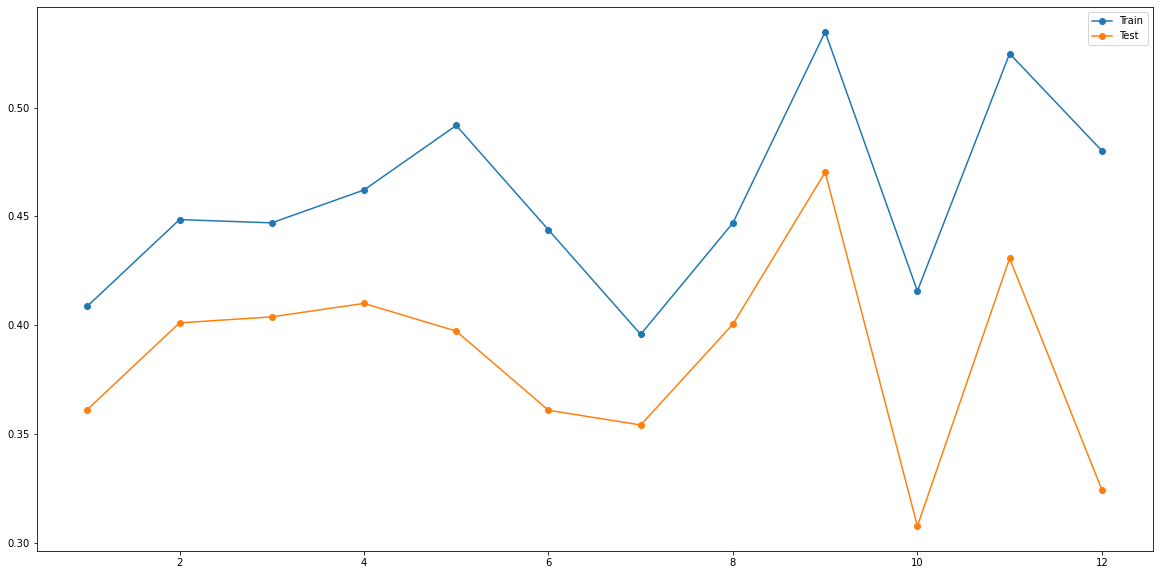

In [152]:
rf = RandomForestClassifier()

parameters= {
    'n_estimators':[2,3],
    'max_depth':[1,2,3],
    'criterion': ['gini'],
    'min_samples_split': [5],
    'bootstrap': [True, False],
    'class_weight' : ['balanced_subsample']
}


cv = GridSearchCV(rf, parameters, cv=3, return_train_score=True, n_jobs=-1)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [153]:
rf_best=cv.best_estimator_

BEST PARAMS: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (5, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.424 (+/-0.0) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (5, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.45 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.437 (+/-0.04) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.427 (+/-0.086) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (40, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.467 (+/-0.02) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (5, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.444 (+/-0.0) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.387 (+/-0.033) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.417 (+/-0.026) for {'ac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

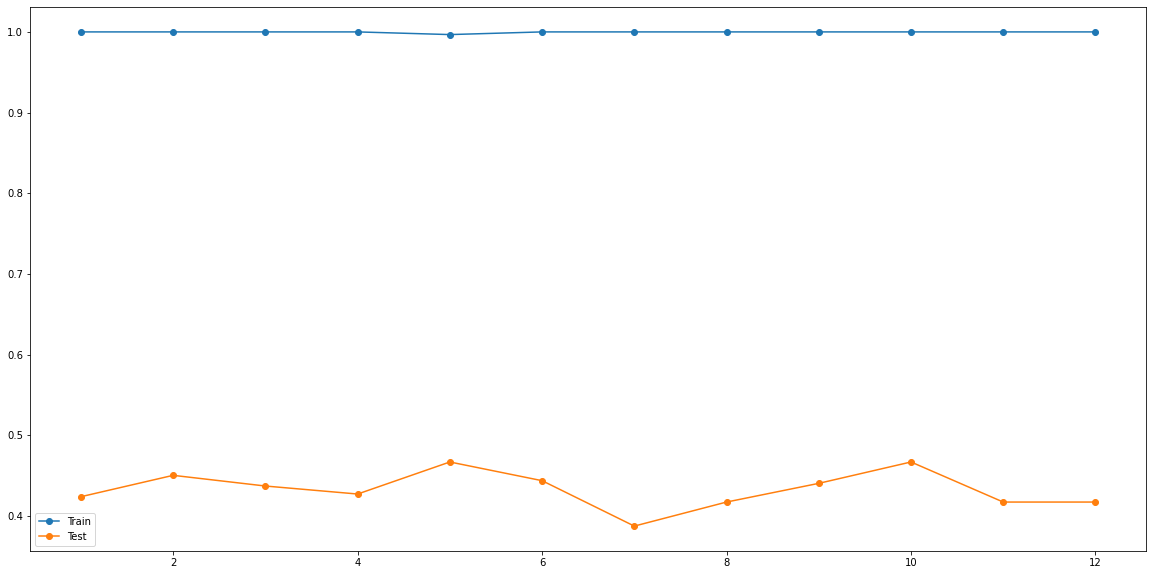

In [154]:
mlp = MLPClassifier()

parameters= {
    'hidden_layer_sizes': [(5,10),(10,10),(20,10),(40,10)],
    'alpha' : [0.001,0.01, 0.1],
    'activation': ["tanh"],
    "learning_rate": ["invscaling"],
    "max_iter": [2200]
}

cv = GridSearchCV(mlp, parameters, cv=2, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [155]:
mlp_best = cv.best_estimator_

BEST PARAMS: {'C': 0.01, 'class_weight': 'balanced', 'kernel': 'linear'}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.56 (+/-0.035) for {'C': 0.01, 'class_weight': 'balanced', 'kernel': 'linear'}
0.441 (+/-0.203) for {'C': 0.01, 'class_weight': 'balanced', 'kernel': 'poly'}
0.52 (+/-0.082) for {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
0.513 (+/-0.005) for {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'poly'}
0.52 (+/-0.082) for {'C': 0.31, 'class_weight': 'balanced', 'kernel': 'linear'}
0.513 (+/-0.005) for {'C': 0.31, 'class_weight': 'balanced', 'kernel': 'poly'}
0.52 (+/-0.082) for {'C': 0.32, 'class_weight': 'balanced', 'kernel': 'linear'}
0.513 (+/-0.005) for {'C': 0.32, 'class_weight': 'balanced', 'kernel': 'poly'}
0.52 (+/-0.082) for {'C': 0.33, 'class_weight': 'balanced', 'kernel': 'linear'}
0.513 (+/-0.005) for {'C': 0.33, 'class_weight': 'balanced', 'kernel': 'poly'}
0.52 (+/-0.082) for {'C': 0.34, 'class_weight': 'balanced', 'kernel': 'linear'}
0.513 (+/-0.005) for {'C': 0.34, 'class_weight': 'balanced', 'kernel': 'poly'}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

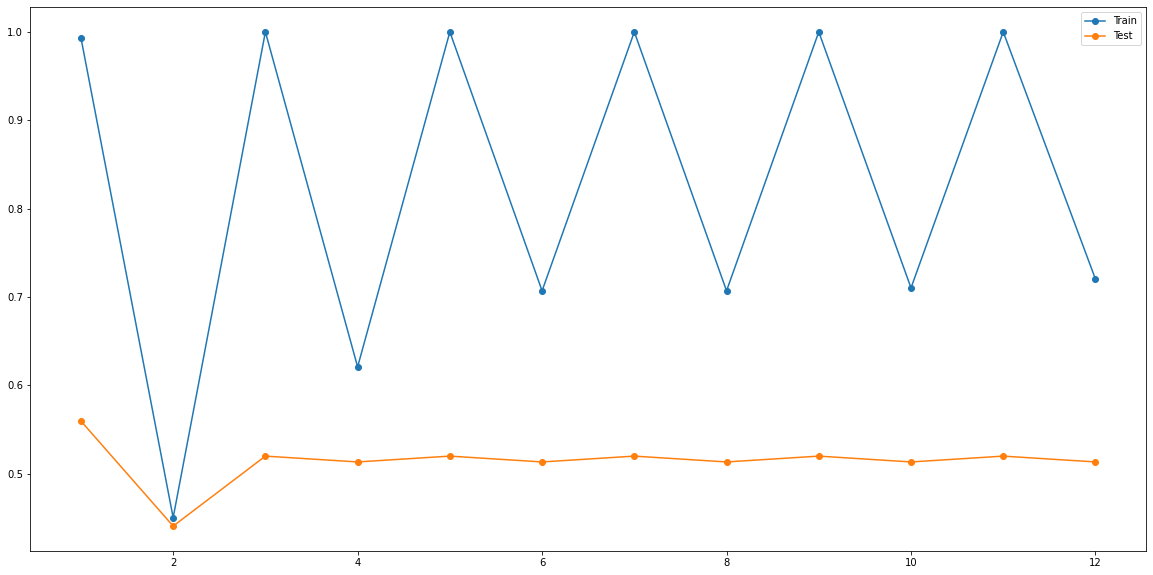

In [156]:
svc = SVC()

parameters= {
    'kernel':["linear", "poly"],
    'C':[0.01, 0.1, 0.31, 0.32, 0.33, 0.34],
    'class_weight' : ['balanced'],
#     'shrinking' : [False]
}

cv = GridSearchCV(svc, parameters, cv=3, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [157]:
svc_best = cv.best_estimator_

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[18:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.566 (+/-0.103) for {'learning_rate': 0.13, 'n_estimators': 25, 'objective': 'reg:squarederror'}
0.553 (+/-0.069) for {'learning_rate': 0.13, 'n_estimators': 27, 'objective': 'reg:squarederror'}
0.556 (+/-0.075) for {'learning_rate': 0.13, 'n_estimators': 29, 'objective': 'reg:squarederror'}
0.566 (+/-0.049) for {'learning_rate': 0.15, 'n_estimators': 25, 'objective': 'reg:squarederror'}
0.56 (+/-0.066) for {'learning_rate': 0.15, 'n_estimators': 27, 'objective': 'reg:squarederror'}
0.556 (+/-0.045) for {'learning_rate': 0.15, 'n_estimators': 29, 'objective': 'reg:squarederror'}
0.56 (+/-0.109) for {'learning_rate': 0.17, 'n_estimators': 25, 'objective': 'reg:squarederror'}
0.553 (+/-0.073) for {'learning_rate': 0.17, 'n_estimators': 27, 'objective': 'reg:squarederror'}
0.556 (+/-0.065) for {'learning_rate': 0.17, 'n_estimators': 29, 'objective': 'reg:squarederror'}
0.543 (+/-0.097) for {'learning_rate': 0.3, 'n_estimators': 25, 'objective': 'reg:squarederror'}
0.546 (+/-0.101) for {'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

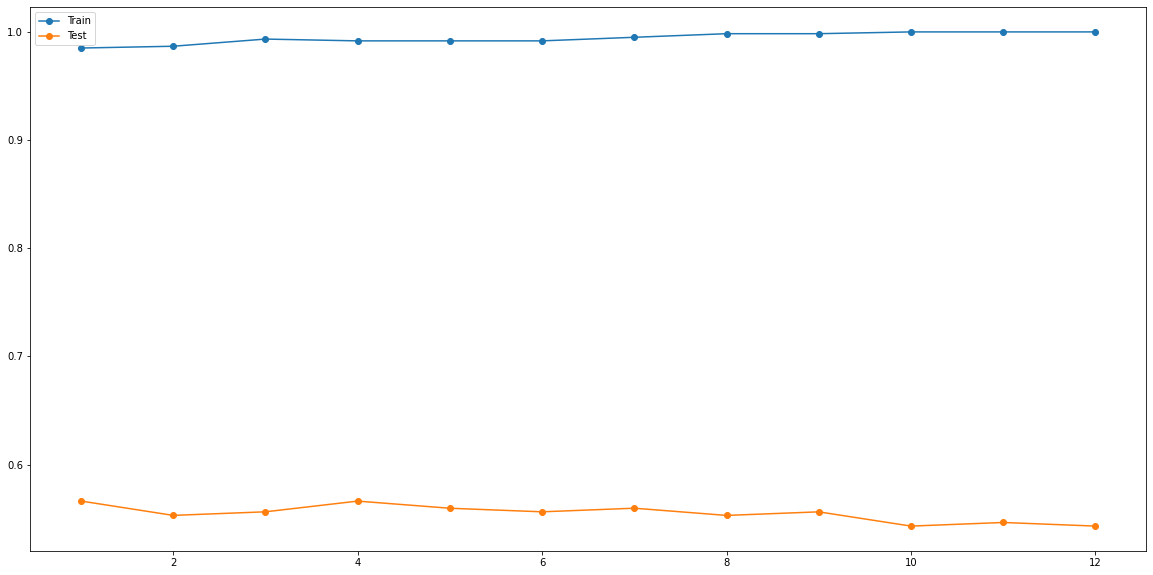

In [158]:
xgb = XGBClassifier()

parameters= {
    "objective": ["reg:squarederror"],
    'n_estimators':[25, 27, 29],
    'learning_rate': [0.13, 0.15, 0.17, 0.30],
#     'max_depth': [2],
#     'min_child_weight': [1],
#     "reg_alpha": [0],
#     "reg_lambda": [1]
}

cv = GridSearchCV(xgb, parameters, cv=3, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [159]:
xgb_best = cv.best_estimator_

In [160]:
models= {"RF" : rf_best, "MLP": mlp_best, "SVM" : svc_best, "XGB": xgb_best}

In [161]:
def evaluate_model(name, model, features, labels):
    start = time()
    global pred
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    f1 = round(f1_score(labels, pred, average='weighted'), 3)
    
    print("{} // Accuracy: {} // Precision: {} // Recall: {}  // F1: {} // Latency: {}ms \n".format(name, 
                                                                                                   accuracy,
                                                                                                   precision,
                                                                                                   recall,
                                                                                                   f1,
                                                                                                   round((end - start), 3)))

In [162]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

RF // Accuracy: 0.134 // Precision: 0.059 // Recall: 0.134  // F1: 0.068 // Latency: 0.002ms 

MLP // Accuracy: 0.433 // Precision: 0.342 // Recall: 0.433  // F1: 0.381 // Latency: 0.001ms 

SVM // Accuracy: 0.478 // Precision: 0.43 // Recall: 0.478  // F1: 0.427 // Latency: 0.077ms 

XGB // Accuracy: 0.522 // Precision: 0.511 // Recall: 0.522  // F1: 0.474 // Latency: 0.005ms 



In [163]:
evaluate_model("XGB", models["XGB"], te_features, te_labels)

XGB // Accuracy: 0.588 // Precision: 0.541 // Recall: 0.588  // F1: 0.563 // Latency: 0.004ms 



C:\Users\Intel PC G5900\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
xgb_best.classes_

array(['data analyst', 'data engineer', 'data scientist'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

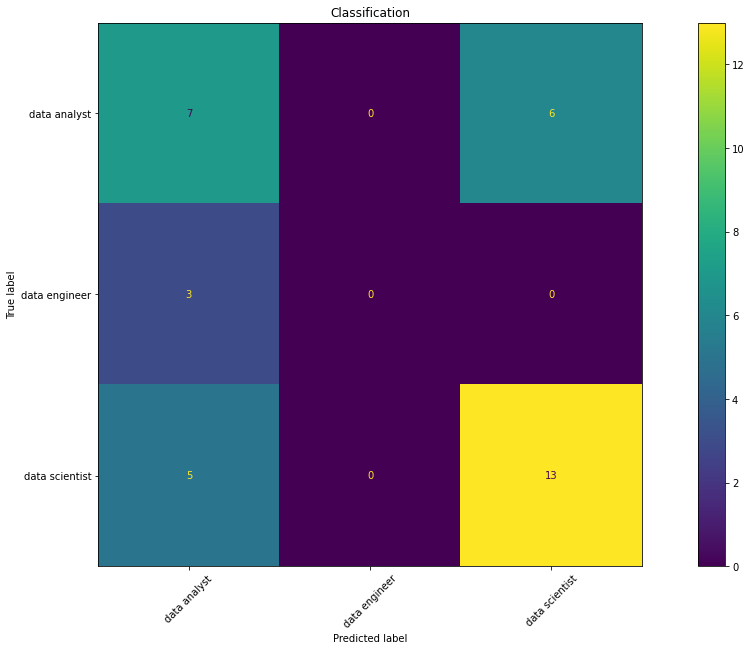

In [165]:
cm = confusion_matrix(te_labels,
                      pred,)
ConfusionMatrixDisplay(cm, display_labels=xgb_best.classes_,).plot()
plt.grid(False)
plt.title("Classification")
plt.xticks(rotation=45)
plt.show()